**Resultados - GeoCov19 - Vader x SenticNet**

Importações e configurações do banco de dados

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

from statistics import mean

In [31]:
from pymongo import MongoClient
client = MongoClient('localhost', 27017)
db = client.SpedDB
collection = db.tweets_brasil

Selecionando dados de registros com geo_source mais confiáveis (place e user_location) que tenham tido escores e polaridades calculadas

In [32]:
df2 = pd.DataFrame.from_records(collection.find({'score': {'$ne':None}, 'polarity':{'$ne':None}, '$or':[{'geo_source':'place'}, {'geo_source':'user_location'}]}, {'state':1,'city':1,'lang':1,'geo_source':1,'score':1,'created_at':1,'text':1,'polarity':1,'_id': 0}).sort('created_at'))

**Resultados - Vader e SenticNet**

Boxplot de scores x polarities

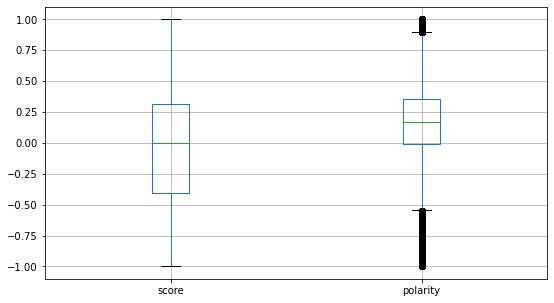

In [4]:
boxplot = df2.boxplot(column=['score', 'polarity'], grid=True, figsize=(9, 5))

Estatísticas sobre scores do Vader

In [5]:
df2['score'].describe()

count    637168.000000
mean         -0.036543
std           0.459181
min          -0.997700
25%          -0.401900
50%           0.000000
75%           0.318200
max           0.999800
Name: score, dtype: float64

Estatísticas sobre scores do SenticNet

In [6]:
df2['polarity'].describe()

count    637168.000000
mean          0.165240
std           0.295944
min          -1.000000
25%          -0.006200
50%           0.170714
75%           0.354458
max           1.000000
Name: polarity, dtype: float64

Scores de sentimento por estado - Vader

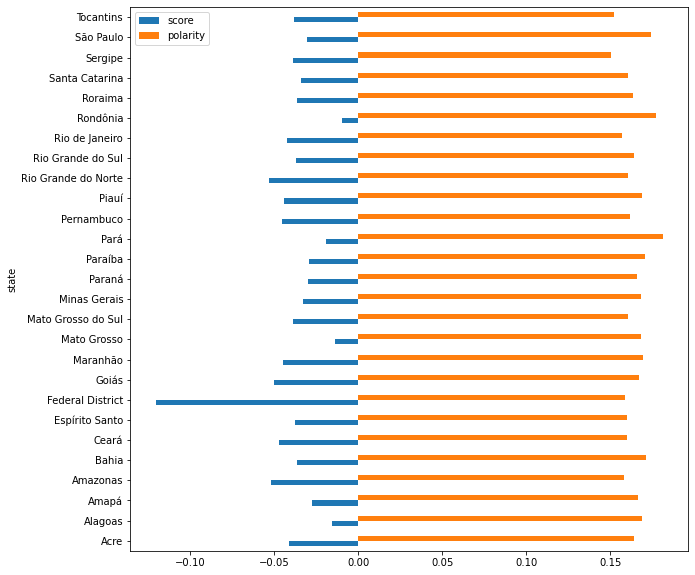

In [5]:
df2.groupby('state')['score','polarity'].mean().plot(kind='barh', figsize=(10, 10))

In [77]:
#df2_by_polarity = df2.groupby('state')['polarity'].agg(['mean'])
#df2_by_polarity.sort_values(by='mean',ascending=False).plot(kind='barh', figsize=(10, 10))

Escore de sentimento por cidade - Vader X SenticNet

In [196]:
# Selecionando as 20 cidades com mais registros
#df_city_top20 = df2.city.value_counts()[:20]

In [79]:
#df2_by_score = df2.groupby('city')['score'].agg(['mean'])
#df2_by_score.sort_values(by='mean',ascending=False).plot(kind='barh', figsize=(10, 700))

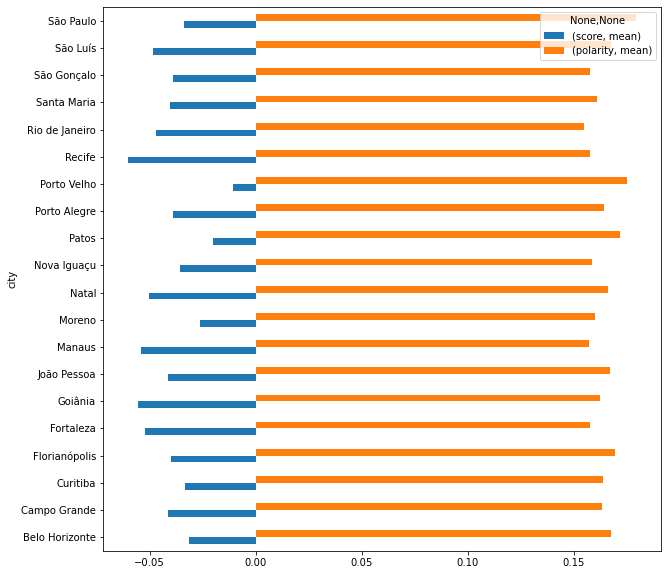

In [6]:
#df2_by_score = df2.groupby('city')['score','polarity'].agg(['mean'])
#df2_by_score.plot(kind='barh', figsize=(10, 700))

df_city_top20 = df2.query('city in ["Rio de Janeiro", "São Paulo", "Belo Horizonte", "Porto Alegre", "Patos", "São Luís", "Recife", "Curitiba", "João Pessoa", "Fortaleza", "Manaus", "Santa Maria", "Nova Iguaçu", "Goiânia", "Natal", "Campo Grande", "Porto Velho", "Florianópolis", "Moreno", "São Gonçalo"]')
df2_by_score = df_city_top20.groupby('city')['score','polarity'].agg(['mean'])
df2_by_score.plot(kind='barh', figsize=(10, 10))

In [80]:
#df2_by_score = df2.groupby('city')['polarity'].agg(['mean'])
#df2_by_score.sort_values(by='mean',ascending=False).plot(kind='barh', figsize=(10, 700))

**Analisando correlações Vader x SenticNet**

In [7]:
len(df2.score.values)

637168

In [8]:
# Dados com resultados distintos

#res1 = collection.count_documents({'polarity':{'$ne':None}, 'score':{'$gt':0}, 'polarity':{'$lt':0}})
#res2 = collection.count_documents({'polarity':{'$ne':None}, 'score':{'$lt':0}, 'polarity':{'$gt':0}})

res1 = df2.query('score > 0 and polarity < 0')
res2 = df2.query('score < 0 and polarity > 0')

print(res1.shape[0]+res2.shape[0])

189435


In [9]:
# Exemplos de textos onde o score foi positivo e a polaridade negativa
df_res1 = res1[['text','score','polarity']].head(100)
df_res1

,text,score,polarity
25,No shit https://t.co/ijsSss35JV,0.4449,-0.99
41,Essa que era a merda https://t.co/BeGBk8d5jz,0.6124,-0.99
73,Tô na merda https://t.co/mDLWmupzjS,0.6124,-0.99
90,no shit sherlock https://t.co/vQuQgimUwf,0.4449,-0.99
95,No shit. https://t.co/56ZLlQF3Al,0.4449,-0.99
...,...,...,...
2159,eu e minhas amigas na quarentena https://t.co/...,0.4767,-0.85
2172,same energy @ufmg https://t.co/7da929eyx3,0.2732,-0.85
2180,Quarentena 🥴🪂😂❤️ https://t.co/Vl247a5YOW,0.4404,-0.85
2186,same energy af https://t.co/QY9VaitL5i,0.2732,-0.85


In [20]:
# Exemplos de textos onde o score foi negativo e a polaridade positiva
df_res2 = res2[['text','score','polarity']].tail(2000)
df_res2

,text,score,polarity
611196,RT @samiabomfim: A defesa anti-científica da h...,-0.3182,0.6608
611197,RT @samiabomfim: A defesa anti-científica da h...,-0.3182,0.6608
611198,RT @samiabomfim: A defesa anti-científica da h...,-0.3182,0.6608
611199,RT @samiabomfim: A defesa anti-científica da h...,-0.3182,0.6608
611200,RT @samiabomfim: A defesa anti-científica da h...,-0.3182,0.6608
...,...,...,...
637067,mama mia https://t.co/eOYnHwJqcb,-0.2960,0.9700
637068,mama mia https://t.co/rdtIDudU5m,-0.2960,0.9700
637076,Kkkkkkkkkk o que n pode é ficar na vontade htt...,-0.2755,0.9840
637082,chocada em cristo https://t.co/9lMeHoYOYC,-0.3182,0.9840


In [16]:
print(len(res3))

472862


In [12]:
res3 = df2.query('polarity > 0')
res3

,created_at,geo_source,state,city,text,score,lang,polarity
164306,2020-02-23 22:21:27,user_location,Rondônia,Porto Velho,RT @DrEricDing: Im worried about public reacti...,-0.2960,en,1.541976e-18
164307,2020-03-12 15:41:14,user_location,Santa Catarina,Florianópolis,Dentro desse futuro caos do corona o que me tr...,-0.1027,pt,1.982541e-18
164308,2020-03-30 09:00:32,user_location,São Paulo,São Paulo,"RT @fsfe: #Freeware, #FreeSoftware and the #Co...",-0.2244,en,2.775558e-18
164309,2020-04-16 11:36:04,user_location,Rio de Janeiro,Volta Redonda,"RT @FranciscoFial16: A covid, além de está mat...",-0.8750,pt,3.469447e-18
164310,2020-04-23 23:38:24,user_location,Rio de Janeiro,Rio de Janeiro,"fui dormir ontem 3hr da manhã e acordei 6, tra...",-0.5848,pt,5.046468e-18
...,...,...,...,...,...,...,...,...
637163,2020-04-26 03:39:37,user_location,Mato Grosso do Sul,Campo Grande,RT @daniechev_: mood https://t.co/Xqw5JEZU7C,0.0000,en,1.000000e+00
637164,2020-04-26 01:53:30,user_location,São Paulo,Lins,RT @GifSafadosOfc: Mood https://t.co/RlwjW16w6K,0.0000,en,1.000000e+00
637165,2020-04-26 02:27:30,user_location,Pernambuco,Escada,RT @rafaoliveiracrf: Mood. https://t.co/sLFquW...,0.0000,en,1.000000e+00
637166,2020-04-29 19:11:25,user_location,Rio de Janeiro,Rio de Janeiro,Mood https://t.co/chImefKhVx,0.0000,en,1.000000e+00


In [13]:
def converter_float(numero):
    formated = "{:.4f}".format(float(numero))
    return float(formated)

In [15]:
converter_float(5.046468e-18)

0.0

In [13]:
# Calculando coeficiente de correlação entre score e polarity (método de Pearson)
df2['score'].corr(df2['polarity'])

0.3431747990844092

Gráfico Vader(score) x SenticNet(polarity)

In [5]:
import seaborn as sns

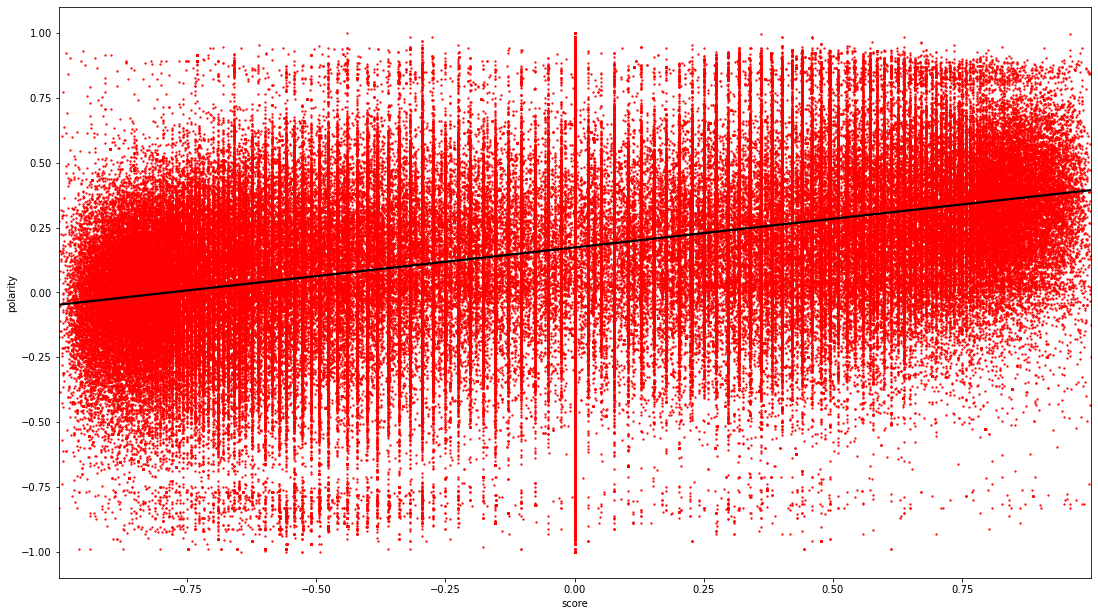

In [12]:
fig = sns.regplot(x='score', y='polarity', data=df2, marker='o', color='red', scatter_kws={'s':2}, line_kws={"color": "black"});
fig.figure.set_size_inches(18.5, 10.5)

In [10]:
# utilizando matplotlib

# plt.rcParams['agg.path.chunksize'] = 10000
# plt.figure(figsize=(40, 40))
# plt.scatter(df2.score.values, df2.polarity.values)

Desconsiderando tweets sem a palavra "corona" (considerada uma palavra positiva pelo SenticNet)

In [27]:
df3 = df2[~df2['text'].str.contains(r'(?:\s|^)corona(?:\s|$)')]
len(df3)

514732

In [29]:
# Calculando coeficiente de correlação entre score e polarity (método de Pearson)
df3['score'].corr(df3['polarity'])

0.3530716952570127